## **파이썬 딥러닝 텐서플로 03. Keras 6~7**

0603 금요일 과제 [필사]

### **06 모델 저장 및 불러오기**

In [3]:
## 앞에서 저장한 데이터셋 불러오기
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax'), 
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train,
            validation_data=(x_test, y_test), 
            epochs=10, 
            )

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2202 - accuracy: 0.9348 - val_loss: 0.1081 - val_accuracy: 0.9655
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0952 - accuracy: 0.9706 - val_loss: 0.0985 - val_accuracy: 0.9697
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0647 - accuracy: 0.9789 - val_loss: 0.0786 - val_accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0487 - accuracy: 0.9840 - val_loss: 0.0778 - val_accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0413 - accuracy: 0.9869 - val_loss: 0.0764 - val_accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0312 - accuracy: 0.9895 - val_loss: 0.0920 - val_accuracy: 0.9749
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - 

#### **6-1** 모델을 파일로 저장

In [4]:
# 모델을 h5 포맷으로 저장
model.save('h5-model.h5')

#### **6-2** 저장된 모델 복원

In [5]:
# 모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 모델 검증
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.09196, acc: 0.97800


In [7]:
# 모델을 SavedModel 포맷으로 저장
model.save('saved-model')

INFO:tensorflow:Assets written to: saved-model/assets


In [8]:
# 모델 복원
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 모델 검증(HDF5 포맷)
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

# 모델 검증(SavedModel 포맷)
loss, acc = saved_model.evaluate(x_test, y_test, verbose=0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.09196, acc: 0.97800
saved_model] loss: 0.09196, acc: 0.97800


### **07 복잡한 모델 생성**

#### **7-1** 함수형 API(Functional API)

In [10]:
## 기존 예제 불러오기
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

* Sequantial API

In [11]:
# 앞에서 사용한 모델 불러오기
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax'), 
])

* Functional API

In [12]:
# 모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape=(28,28), name='InputLayer')

# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name='Faltten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

In [13]:
# 모델 생성
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Faltten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


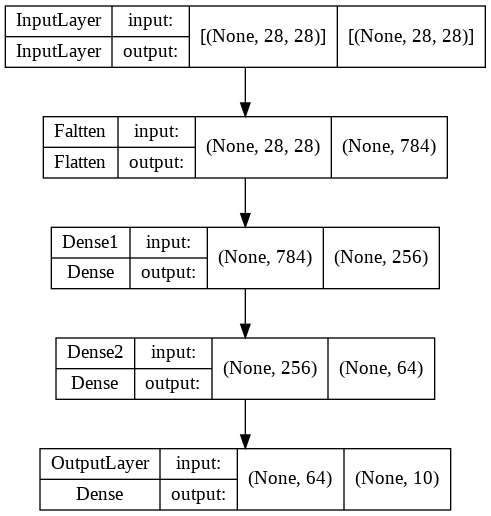

In [14]:
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [15]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# 훈련
func_model.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2114 - accuracy: 0.9384
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0867 - accuracy: 0.9735
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0603 - accuracy: 0.9816
Functional Model] loss: 0.07408, acc: 0.97680


#### **7-2** 모델 서브클래싱(Model Subclassing)

In [20]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(10, activation='softmax')

    # method overiding
    # 훈련용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [21]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_14 (Dense)            multiple                  200960    
                                                                 
 dense_15 (Dense)            multiple                  16448     
                                                                 
 dense_16 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [22]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2157 - accuracy: 0.9352
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0876 - accuracy: 0.9730
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0595 - accuracy: 0.9810
Subclassing Model] loss: 0.08174, acc: 0.97380


#### **7-3** 서브클래싱 모델 파라미터를 활용한 생성

In [23]:
class MyModel(tf.keras.Model):

    # 생성자 파라미터 추가
    def __init__(self, units, num_classes):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units, activation='relu')
        self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
        self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')

    # class overiding
    # 훈련용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [24]:
# 모델 생성
mymodel = MyModel(256,10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "my_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         multiple                  0         
                                                                 
 dense_17 (Dense)            multiple                  200960    
                                                                 
 dense_18 (Dense)            multiple                  16448     
                                                                 
 dense_19 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w.parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2189 - accuracy: 0.9354
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0892 - accuracy: 0.9729
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0621 - accuracy: 0.9800
Subclassing Model w.parameters] loss: 0.08065, acc: 0.97410
